# Sentiment analysis

##  Set up

In [5]:
#%pip install numpy pandas nltk sklearn

In [1]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

## Load dataset

In [2]:
df = pd.read_csv(r'../resources/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## Tiền xử lý dữ liệu

### Làm sạch dữ liệu 
- Loại bỏ các thẻ HTML
- Loại bỏ khoảng trắng thừa và dấu câu 
- Chuyển đổi chữ hoa thành chữ thường 

#### Loại bỏ thẻ HTML

In [4]:
df['review'] = df['review'].str.replace("<br />", "")
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

#### Loại bỏ khoảng trắng thừa và dấu câu

In [5]:
df['review'] = df['review'].str.translate(str.maketrans('', '', string.punctuation))

#### Loại bỏ stop words

In [6]:
# Tải stop words từ nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PAVT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop_words.remove('no')
stop_words.remove('not')

In [12]:
def remove_stop_words(text):
    words = text.split()
    filter_words = [word for word in words if word not in stop_words]
    return ' '.join(filter_words)

In [ ]:
# df['review'] = df['review'].apply(remove_stop_words)
# df['review'][2]

'I thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy The plot simplistic dialogue witty characters likable even well bread suspected serial killer While may disappointed realize Match Point 2 Risk Addiction I thought proof Woody Allen still fully control style many us grown loveThis Id laughed one Woodys comedies years dare I say decade While Ive never impressed Scarlet Johanson managed tone sexy image jumped right average spirited young womanThis may crown jewel career wittier Devil Wears Prada interesting Superman great comedy go see friends'

#### Chuyển chữ hoa thành chữ thường 

In [13]:
df['review'] = df['review'].str.lower()
df['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends'

### Chia dữ liệu

In [14]:
data_removed = df['review'].apply(remove_stop_words)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

## Word embeddings

### Word2Vec

#### Nonpretrained model

In [15]:
def count(word_check, sentences):
    res = 0
    for sentence in sentences: 
        for word in sentence: 
            if word == word_check: 
                res += 1
    return res


In [16]:
from gensim.models import Word2Vec

In [17]:
sentences = []
for sentence in X_train:
    sentences.append(sentence.split())

In [18]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers = 80)

#### Pretrained model

#### Khảo sát một số từ

In [19]:
similar_words = model.wv.most_similar('heartfelt')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

heartwarming: 0.8001381754875183
bittersweet: 0.7961912751197815
understated: 0.7901477217674255
evocative: 0.7856943011283875
uplifting: 0.7852193713188171
poignant: 0.7798234224319458
layered: 0.7721375226974487
affecting: 0.7697457671165466
breezy: 0.7670418620109558
lyrical: 0.7669417858123779


In [20]:
similar_words = model.wv.most_similar('insincere')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

plotwise: 0.834276020526886
irritatingly: 0.8269851803779602
witless: 0.8269438743591309
puerile: 0.8266245722770691
insufferably: 0.8226025104522705
obnoxiously: 0.8024957180023193
imitated: 0.8019513487815857
excessively: 0.8009130954742432
unforgivably: 0.7986444234848022
arbitrary: 0.7982031106948853


In [21]:
similar_words = model.wv.most_similar('unpredictable')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

unsettling: 0.8296356797218323
tense: 0.8232300281524658
improbable: 0.8071044683456421
unnerving: 0.8028813004493713
ingenious: 0.8008222579956055
engrossing: 0.798582911491394
unsatisfying: 0.7927833199501038
gripping: 0.7894553542137146
implausible: 0.7869803309440613
poignant: 0.7825915217399597


In [22]:
similar_words = model.wv.most_similar('meaningful')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

philosophical: 0.7582659125328064
complex: 0.7323887944221497
subtle: 0.7316615581512451
compelling: 0.7277553677558899
profound: 0.722320556640625
coherent: 0.7212851047515869
complexity: 0.7182160019874573
emotional: 0.7148432731628418
clarity: 0.710483968257904
layered: 0.7103366851806641


In [23]:
similar_words = model.wv.most_similar('meaningless')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

nonsensical: 0.8519917130470276
unnecessary: 0.8366928100585938
banal: 0.8338872790336609
trite: 0.8285499811172485
illogical: 0.8242729902267456
pointless: 0.8169264197349548
muddled: 0.8167775869369507
implausible: 0.8105539083480835
melodramatic: 0.8099694848060608
contrived: 0.807438850402832


In [24]:
similar_words = model.wv.most_similar('not')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

isnt: 0.5908660292625427
neither: 0.5655514597892761
hardly: 0.5394440293312073
indeed: 0.4811230003833771
departmentlooks: 0.4685591757297516
listenable: 0.45719319581985474
wasnt: 0.44737914204597473
notquitetruthful: 0.4423930048942566
dieselanyways: 0.4421646296977997
unfilmable: 0.44003552198410034


In [25]:
similar_words = model.wv.most_similar('coherent')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

cohesive: 0.8025611639022827
convoluted: 0.7827995419502258
linear: 0.7791509032249451
simplistic: 0.7666434049606323
straightforward: 0.7639018893241882
muddled: 0.757595956325531
conventional: 0.7551547884941101
logical: 0.7473810315132141
hackneyed: 0.7448147535324097
consistency: 0.74423748254776


In [26]:
similar_words = model.wv.most_similar('impressive')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

effective: 0.8286255598068237
spectacular: 0.7694238424301147
outstanding: 0.7464741468429565
breathtaking: 0.7436376810073853
exceptional: 0.7434752583503723
uneven: 0.741938591003418
imaginative: 0.7355571389198303
inventive: 0.7354201078414917
atmospheric: 0.7334215044975281
authentic: 0.7311122417449951


In [27]:
similar_words = model.wv.most_similar('unimpressive')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

sizzling: 0.846238374710083
threadbare: 0.8315722346305847
poorthe: 0.8283817768096924
enticing: 0.8268511295318604
underwhelming: 0.823237955570221
wellcrafted: 0.8171905875205994
sparse: 0.8123274445533752
unremarkable: 0.8069184422492981
pointlessly: 0.8066129684448242
outlandish: 0.8050666451454163


In [28]:
similar_words = model.wv.most_similar('incoherent')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

implausible: 0.8773552775382996
ludicrous: 0.8614974617958069
uninteresting: 0.8608190417289734
unoriginal: 0.8555545210838318
uninspired: 0.8484287858009338
nonsensical: 0.8420553207397461
incomprehensible: 0.8373035192489624
absurd: 0.8363911509513855
overlong: 0.8352799415588379
unimaginative: 0.8349074125289917


In [29]:
similar_words = model.wv.most_similar('frustrated')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

disturbed: 0.8302221298217773
suspicious: 0.7902408838272095
abused: 0.7796526551246643
depressed: 0.7745065689086914
sexually: 0.771832287311554
humiliated: 0.755045473575592
assaulted: 0.7543936371803284
frightened: 0.7501185536384583
betrayed: 0.7500025629997253
verbally: 0.7446112632751465


In [31]:
similar_words = model.wv.most_similar('fulfilled')
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

hither: 0.7421703338623047
unhappiness: 0.7388203144073486
suppressed: 0.7276306748390198
confronting: 0.7175397276878357
girlyoung: 0.7173219919204712
enabled: 0.7135430574417114
abandonment: 0.7128797769546509
mourning: 0.7107270956039429
mourns: 0.7059494853019714
virtzer: 0.7033678889274597


#### sentence embeddings

In [32]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [33]:
def sum_weights(vectors, w):
    res = np.zeros(100)
    for i in range(len(vectors)):
        res += w[i]*vectors[i]
    return res

Các tiêu chí đánh giá phim: 
- Kịch bản: 
    + coherent/ incoherent
    + unpredictable/ predictable
- Ý nghĩa phim: meaningful/ meaningless
- Hiệu ứng: impressive / unimpressive
- Cảnh quay: heartfelt / insincere

In [34]:
def leaky_ReLU_prob(x):
    if x < np.sqrt(3)/2:
        return x
    else:
        return 2*x

In [35]:
def id_v(x):
    return x

In [36]:
list_positive_words = ['heartfelt', 'gripping', 'impressive', 'meaningful', 'coherent']
list_negative_words = ['insincere', 'predictable', 'soporific', 'illogical', 'uninteresting']
# incoherent == uninteresting
# meaningless == illogical
# unimpressive == soporific
# unpredictable == gripping


In [37]:
list_positive = [model.wv[word] for word in list_positive_words ]
list_negative = [model.wv[word] for word in list_negative_words ]

In [38]:
for i in range(len(list_positive)):
    print(cosine_similarity(list_positive[i], list_negative[i]))

0.5650173
0.6078095
0.43830281
0.6171811
0.5693754


In [43]:
positive_vector = sum_weights(list_positive, [2, 1, 3, 1, 1])
negative_vector = sum_weights(list_negative, [2, 1, 3, 1, 1])

In [44]:
cosine_similarity(positive_vector, negative_vector)

0.6480460530391221

In [183]:
def sentence_to_vector(sentence, model, f = id_v):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv] # vector 100 từ
    #dedicates= []
    pos_weights = []
    neg_weights = []
    res = np.zeros(model.vector_size)
    if len(word_vectors) == 0:
        return res
    for i in range(len(word_vectors)):
        word_vector = word_vectors[i]
        checkPositive = cosine_similarity(word_vector, positive_vector) # < 1
        checkNegative = cosine_similarity(word_vector, negative_vector) # < 1
        # if(checkPositive > checkNegative):
        #     dedicates.append(f(checkPositive))
        # elif(checkNegative > checkPositive):
        #     dedicates.append(f(checkNegative))
        # else:
        #     dedicates.append(0.0)
        # dedicates.append(f(checkPositive + checkNegative))
        pos_weights.append(checkPositive)
        neg_weights.append(checkNegative)

    pos_res = sum_weights(word_vectors, pos_weights)
    neg_res = sum_weights(word_vectors, neg_weights)
    return np.concatenate([pos_res, neg_res])

    # if(len(dedicates) > 0):
    #     res = sum_weights(word_vectors,dedicates)
    # return res

In [184]:
test = sentence_to_vector(X_demo[300].split(), model, f= leaky_ReLU_prob)

#### Demo

In [46]:
size_demo = 500 
values_pos = []
values_neg = []
X_demo = np.array(X_train[:500])
y_demo = np.array(y_train[:500])

In [47]:

for i in range(size_demo):
    word_vector  = sentence_to_vector(X_demo[i].split(), model, f = leaky_ReLU_prob)
    #print(df['review'][i])
    #print(word_vector)
    cosPos = cosine_similarity(word_vector, positive_vector)
    cosNeg = cosine_similarity(word_vector, negative_vector)
    #{cosPos:.4f} - {cosNeg:.4f} -
    #values.append( (cosPos - cosNeg)*10 )
    values_pos.append(cosPos*10)
    values_neg.append(cosNeg*10)
    print(f"{cosPos*10:.4f} - {cosNeg*10:.4f} - {(cosPos-cosNeg)*10:.4f}", end = " : ")
    # print(cosNeg, end = " - ")
    # print((cosPos-cosNeg)*10, end = " : ")
    print(y_demo[i])

5.0166 - 5.2243 - -0.2077 : negative
5.4063 - 4.9693 - 0.4371 : positive
5.5606 - 5.9775 - -0.4169 : negative
5.2523 - 5.3346 - -0.0823 : positive
4.1387 - 5.4236 - -1.2850 : negative
5.3927 - 5.4706 - -0.0779 : negative
4.8821 - 6.0968 - -1.2147 : negative
6.1682 - 5.3615 - 0.8067 : negative
4.2670 - 5.0927 - -0.8257 : positive
4.9901 - 5.4118 - -0.4217 : negative
3.7445 - 3.6773 - 0.0672 : positive
3.4923 - 4.7358 - -1.2434 : negative
4.6083 - 5.1513 - -0.5430 : positive
4.5681 - 4.6848 - -0.1166 : positive
5.5129 - 4.6865 - 0.8265 : positive
5.3995 - 5.3423 - 0.0573 : positive
6.2747 - 5.8908 - 0.3839 : positive
5.5280 - 5.5809 - -0.0529 : negative
5.4412 - 5.4774 - -0.0361 : negative
5.8915 - 5.3959 - 0.4956 : positive
4.6387 - 5.4459 - -0.8072 : negative
5.3824 - 5.6803 - -0.2979 : negative
6.8476 - 6.0576 - 0.7900 : positive
6.8227 - 6.0031 - 0.8196 : positive
4.9916 - 5.2707 - -0.2792 : negative
5.0721 - 4.7575 - 0.3145 : positive
5.1717 - 4.7807 - 0.3910 : negative
4.3550 - 4.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


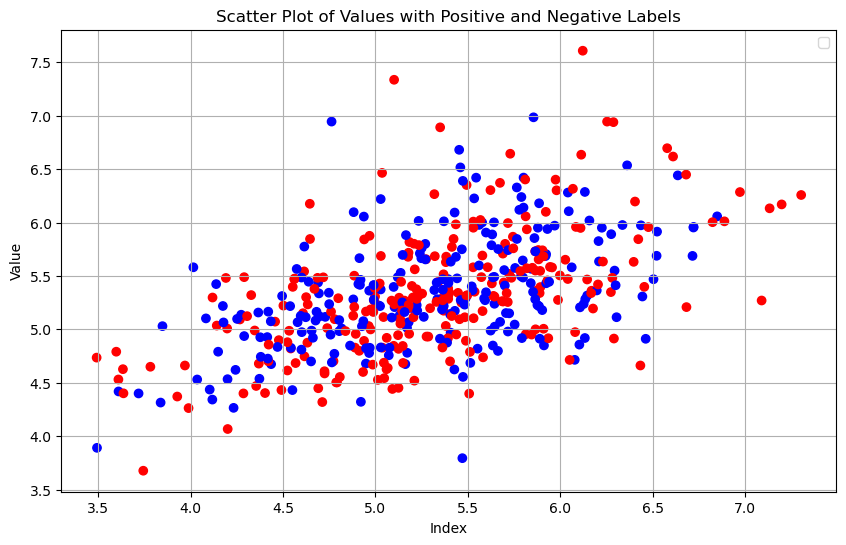

In [48]:
# Tạo biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Chia dữ liệu thành hai nhóm: positive và negative
# positive_values = [values[i] for i in range(500) if df['sentiment'][i] == 'positive']
# positive_indices = [i for i in range(500) if df['sentiment'][i]  == 'positive']

# negative_values = [values[i] for i in range(len(values)) if df['sentiment'][i] == 'negative']
# negative_indices = [i for i in range(len(values)) if df['sentiment'][i] == 'negative']

x_values = [values_pos[i] for i in range(500)]
y_values = [values_neg[i] for i in range(500)]


# Vẽ biểu đồ với các nhóm khác nhau
# plt.scatter(positive_indices, positive_values, color='blue', label='Positive')
# plt.scatter(negative_indices, negative_values, color='red', label='Negative')
colors = ['blue' if sentiment == 'positive' else 'red' for sentiment in df['sentiment'][:500]]
# labels = [ sentiment for sentiment in df['sentiment'][:500]]
plt.scatter(x_values, y_values, color = colors)


# Thiết lập các thông số biểu đồ
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Values with Positive and Negative Labels')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

#### Tạo tập train và test cho model

In [49]:
X_w2v_train = [ sentence_to_vector(sent.split(), model, leaky_ReLU_prob)  for sent in X_train]
X_w2v_test =  [ sentence_to_vector(sent.split(), model, leaky_ReLU_prob)  for sent in X_test]

In [186]:
X_train_removed = X_train.apply(remove_stop_words)
X_test_removed = X_test.apply(remove_stop_words)
X_w2v_train_removed = [ sentence_to_vector(sent.split(), model)  for sent in X_train_removed]
X_w2v_test_removed =  [ sentence_to_vector(sent.split(), model)  for sent in X_test_removed]

### Tf-idf

In [ ]:
# Chuyển đổi văn bản thành các đặc trưng số sử dụng TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Mô hình

### Hàm khảo sát

In [50]:
from sklearn.metrics import accuracy_score, classification_report
def train_and_valid(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train) 
    y_pred = model.predict(X_test)
    # Đánh giá mô hình
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"training accuracy: {accuracy_train} \nvalidation accuracy: {accuracy_test}")
    

### Decision tree

In [187]:
# Huấn luyện mô hình Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    random_state=42, 
    max_depth= 16
)


In [54]:
train_and_valid(clf, X_w2v_train, y_train, X_w2v_test, y_test)

training accuracy: 0.9816285714285714 
validation accuracy: 0.7249333333333333


In [188]:
train_and_valid(clf, X_w2v_train_removed, y_train, X_w2v_test_removed, y_test)

training accuracy: 0.9819428571428571 
validation accuracy: 0.7412666666666666


#### Bảng tổng kết Decision tree
| Mô hình | Tham số | Độ chính xác trên tập train | Độ chính xác | Đánh giá | 
|---------|----------|------|--------|----|
|Decision tree | default | -- | 0.7217 | --|
|Decision tree | criterion = entropy_loss | --  | 0.7202| --|
|Decision tree | criterion = log_loss | 1 | 0.7202 | Overfitting |
|Decision tree | criterion = log_loss, max_depth = 50 | 0.98 | 0.7228 | Overfitting |
|Decision tree | criterion = log_loss, max_depth = 25 | 0.89 | 0.73 | Bad |
|Decision tree | criterion = log_loss, max_depth = 37,  | 0.95 | 0.7259 | Overfitting |
|Decision tree | criterion = gini, max_depth = 37, max features = 50k | 0.95 | 0.7314 | Overfitting |
|Decision tree | criterion = gini, max_depth = 37, max leaf node = 2000 | 0.95 | 0.7337 | Overfitting |
|Decision tree | criterion = gini, max_depth = 15, max leaf node = 100 | 0.76 | 0.7467 | Bad |
|Decision tree | criterion = gini, max_depth = 15, max leaf node = 100 | 0.78 | 0.7418 | Bad |

### Logistic regression


In [191]:
from sklearn.linear_model import LogisticRegression

# Huấn luyện mô hình Logistic Regression
log_regr = LogisticRegression(
    random_state=42,
    max_iter= 500
)


In [60]:
train_and_valid(log_regr,X_w2v_train, y_train, X_w2v_test, y_test)

training accuracy: 0.8504857142857143 
validation accuracy: 0.8502666666666666


In [192]:
train_and_valid(log_regr,X_w2v_train_removed, y_train, X_w2v_test_removed, y_test)

training accuracy: 0.8612571428571428 
validation accuracy: 0.8609333333333333


### Random forest

In [193]:
# Import các thư viện cần thiết
from sklearn.ensemble import RandomForestClassifier

# Huấn luyện mô hình Random Forest
rf_clf = RandomForestClassifier(
    random_state=42,
)

In [62]:
train_and_valid(rf_clf, X_w2v_train, y_train, X_w2v_test, y_test)

training accuracy: 0.9999714285714286 
validation accuracy: 0.8192


In [194]:
train_and_valid(rf_clf, X_w2v_train_removed, y_train, X_w2v_test_removed, y_test)

training accuracy: 1.0 
validation accuracy: 0.8286666666666667


depth = 15 --> 0.8285 \
depth = 37 --> 0.84

### SVM

In [ ]:
# from sklearn.svm import SVC

In [ ]:
# svm_classifier = SVC(
#     random_state=42,
#     kernel = 'poly',
# )

In [ ]:
# svm_classifier.fit(X_train,y_train)

SVC(kernel='sigmoid', random_state=42)

### XGBoost

In [195]:
import xgboost as xgb

# Tạo mô hình XGBoost
xgb = xgb.XGBClassifier()

# Huấn luyện mô hình
y_train_new = np.where(y_train == 'negative', 0 , 1)
y_test_new = np.where(y_test == 'negative', 0, 1)

# Dự đoán trên tập kiểm tra
train_and_valid(xgb, X_w2v_train_removed, y_train_new, X_w2v_test_removed, y_test_new)

training accuracy: 0.9764857142857143 
validation accuracy: 0.8385333333333334


### MLP

In [196]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Tạo mô hình MLP
mlp_classifier = MLPClassifier(
    random_state=42,
)


In [90]:
train_and_valid(mlp_classifier, X_w2v_train ,y_train ,X_w2v_test, y_test)

training accuracy: 0.8823428571428571 
validation accuracy: 0.8486666666666667


In [92]:
res = mlp_classifier.predict(X_w2v_train)

In [197]:
# Huấn luyện mô hình
train_and_valid(mlp_classifier, X_w2v_train_removed,y_train ,X_w2v_test_removed, y_test)

d:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


training accuracy: 0.9530857142857143 
validation accuracy: 0.8211333333333334


### Ensemble model

In [ ]:
### Ensemble models
class EnsembleModel:
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
    def __print__(self):
        for model in model: 
            print(model)
    def fit(self, X_train, y_train):
        # Huấn luyện mô hình
        for model in self.models: 
            model.fit(X_train, y_train_new)
    def predict(self, X_test):
        # Khởi tạo ma trận kết quả với kích thước (số mô hình, số mẫu trong X_test)
        res_models = np.zeros((len(self.models), len(X_test)))

        # Dự đoán từ từng mô hình và nhân với trọng số tương ứng
        for i in range(len(self.models)):
            y_pred = self.models[i].predict(X_test); 
            y_pred_encoded = np.where(y_pred == 'negative', 0, 1)
            res_models[i] = y_pred_encoded*self.weights[i]
    
        # Tính giá trị trung bình theo chiều dọc (theo từng mẫu)
        res_vote = np.average(res_models, axis=0)  # axis=0 để tính trung bình cho từng mẫu
        
        # Nếu bạn muốn chuyển sang 'positive' / 'negative' (giả sử 1 là positive và 0 là negative)
        res_vote = np.where(res_vote > 0.5, 'positive', 'negative')
        
        return res_vote  # Hoặc nếu bạn cần kết quả dạng nhãn, trả về res_vote đã được chuyển đổi


In [165]:
test_accuracy_models = np.array([0.725, 0.850, 0.831, 0.831, 0.818])
sum_accuracy = np.sum(test_accuracy_models)
weights = [test_acc*5/sum_accuracy for test_acc in test_accuracy_models ]
weights

[0.8939580764488286,
 1.0480887792848337,
 1.0246609124537607,
 1.0246609124537607,
 1.0086313193588163]

In [166]:
ensemble_model = EnsembleModel([clf, log_regr, rf_clf, xgb, mlp_classifier], weights)

[0.5,1.5,0.75,0.75,1.5] --> 0.855 \
weights --> 0.8466

In [167]:
ensemble_res = ensemble_model.predict(X_w2v_test)
ensemble_res.shape

C:\Users\PAVT\AppData\Local\Temp\ipykernel_27748\2884763099.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_pred_encoded = np.where(y_pred == 'negative', 0, 1)


(15000,)

In [168]:
accuracy_score(ensemble_res, y_test)

0.8466666666666667

## Tổng kết

| Mô hình Word Embeddings| Dữ liệu |Mô hình ML| Tham số | training accuracy | testing accuracy | Đánh giá | 
|---------|------|----------|------|--------|----|---|
|Word2Vec|Không loại stop words |Decision tree | default | 0.979 | 0.7249 | Overfitting |
|Word2Vec|Không loại stop words |Logistic Regression | max_iter = 400 | 0.852 | 0.850 | -- |
|Word2Vec|Không loại stop words |Random forest | default | 0.99997 | 0.818 | Ovefitting |
|Word2Vec|Không loại stop words  |XGBoost | default | 0.961 | 0.833 | Ovefitting |
|Word2Vec|Không loại stop words |MLP | max_iter = 250, learning_rate_init = 0.0005 | 0.868 | 0.850 | -- |
|Word2Vec|Loại stop words |Decision tree | default | 0.976 | 0.751 | Overfitting |
|Word2Vec|Loại stop words |Logistic Regression | default | 0.850 | 0.848 | -- |
|Word2Vec|Loại stop words |Random forest | default | 0.999 | 0.830 | Overfitting |
|Word2Vec|Loại stop words  |XGBoost | default | 0.964 | 0.834 | Ovefitting |
|Word2Vec|Loại stop words |MLP | default | 0.938 | 0.816 | Overfitting |
